In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from ipywidgets import interact, IntSlider
from ipywidgets import FloatSlider
from ipywidgets import Layout 
from scipy import signal
from matplotlib import gridspec
from scipy.fft import fftshift
import warnings

In [ ]:
## This will be the data you collect with your

In [3]:
############################# If you are using Mac, you may need to remove the r before the path ###############################
seis = pd.read_csv(r"C:\Users\cacam\Documents\10-01-compare\seismo_test_cal_2024-10-01T22-07-09-752.csv"
                   , skiprows = 5, delimiter=',') 

seis.columns = ["Sample", "Time (s)", "Noise (V)", "Channel Z (V)", "Channel N (V)", "Channel E (V)", "blank"]

tim = seis['Time (s)']
z = seis['Channel Z (V)'] * 0.0125e-1

###################################### This is the sample rate we used in testing ##############################################
fs = 1651.612903

In [25]:
seisz = pd.read_csv(r"C:\Users\cacam\Documents\10-01-compare\min_10-01.csv", skiprows = 8, delimiter=',')

tim = seisz['Time']
min_z = seisz[' Sample'] * 0.0015 * 10 ** -6

################################################ Do not change this value ######################################################
min_fs = 200

In [4]:
################################################## Colorbar Limits #############################################################
cmin = 10e-10
cmax = 50e-9

##################################################### Plot limits ##############################################################
ymax = 20 ## In terms of frequency
ymin = 0

###################################################### fft length ##############################################################
fft_len = 1 ## in terms of seconds

################################################# Precent FFT Overlap ##########################################################
olap = 50 ## 50% fft overlap

(0.0, 20.0)

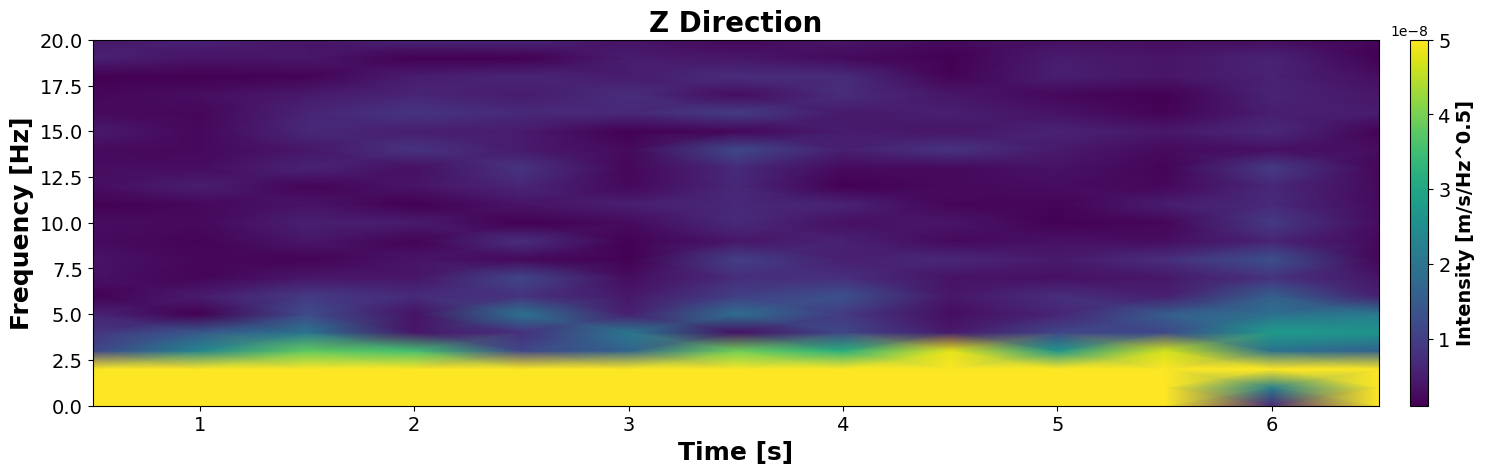

In [92]:
fz, tz, Sxxz = signal.spectrogram(min_z, fs, window= 'hamming', nperseg=round(fs *fft_len), noverlap= round(fs *(olap *0.01)) )
fn, tn, Sxxn = signal.spectrogram(n, fs, window= 'hamming', nperseg=round(fs *fft_len), noverlap= round(fs *(olap *0.01)) )
fe, te, Sxxe = signal.spectrogram(e, fs, window= 'hamming', nperseg=round(fs *fft_len), noverlap= round(fs *(olap *0.01)) )
#f, t, Sxx = signal.spectrogram(noi, fs, window= 'hamming', nperseg=round(fs *fft_len), noverlap= round(fs *(olap *0.01)) )


fig = plt.figure(figsize = (20,24))

gs = gridspec.GridSpec(4,1, height_ratios = [1,1,1,1], hspace = 0.35)

####################################################### Channel Z ##############################################################

axis1 = fig.add_subplot(gs[0,0])

#m0 = axis1.pcolormesh(tz, fz, np.sqrt(Sxxz), shading='gouraud')############### This will autoscale the plot ###################
                                                                ## If you want to change the limits, uncomment the line below ##
                                                                ########### Be sure to comment out the line above ##############

m0 = axis1.pcolormesh(tz, fz, np.sqrt(Sxxz), shading='gouraud', vmin = cmin, vmax = cmax)

axis1.set_title("Z Direction", fontweight = 'bold' , fontsize = 20)
axis1.set_xlabel('Time [s]', fontweight = 'bold' , fontsize = 18)
axis1.set_ylabel('Frequency [Hz]', fontweight = 'bold' , fontsize = 18)
axis1.tick_params(labelsize=14)

cbar0 = fig.colorbar(m0, label='Intensity [m/s/Hz^0.5]', pad =0.02)
cbar0.ax.tick_params(labelsize=14)
cbar0.set_label(label='Intensity [m/s/Hz^0.5]' ,weight='bold', fontsize = 14)

axis1.set_ylim(ymin,ymax) ## Uncomment to set limits

In [5]:
##################################################### Plot limits ##############################################################

y_max = 10e-1
y_min = 50e-4 

x_max = 100
x_min = 0.1

###################################################### fft length ##############################################################
fft_length = 128

################################################# Precent FFT Overlap ##########################################################
overlap = 50

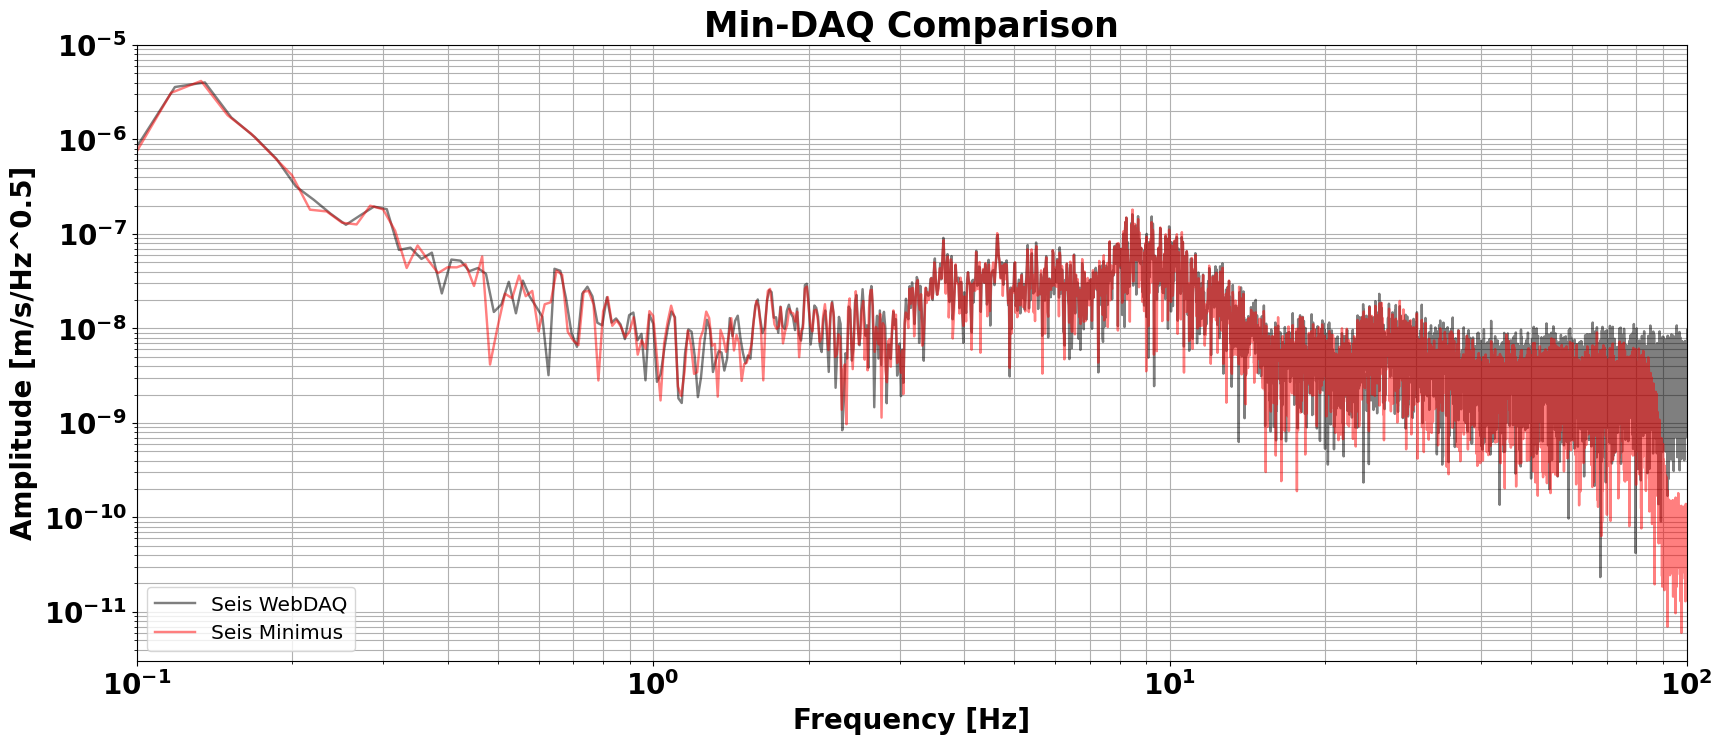

In [34]:
################################################################################################################################
######################################## The PSD is calculated via welch from scipy ############################################
################################################################################################################################
warnings.simplefilter('ignore')

############ If you don't want to look at the whole time series, you can add '1' to the variables, i.e k1, j1, i1 ##############

f_z, Pxx_den_z = signal.welch(z, fs, window= 'hamming',nperseg= (fs*fft_length),noverlap= round(fs *(overlap *0.01)))
f_n, Pxx_den_n = signal.welch(min_z, min_fs, window= 'hamming',nperseg= (fs*fft_length),noverlap= round(fs *(overlap *0.01)))
f_e, Pxx_den_e = signal.welch(e[0:-140800], fs, window= 'hamming',nperseg= (fs*fft_length),noverlap= round(fs *(overlap *0.01)))

################### nfft is how long the fft bin lengths, noverlap is bin overlap, window is the window used ###################
####################### We used 100 sec bins, 0.5 sec overlap, and hamming window, these can be changed ########################
################################################ # DO NOT CHANGE/REMOVE 'fs' # #################################################

az = np.sqrt(Pxx_den_z)
an = np.sqrt(Pxx_den_n) ################################ This turns the PSD into an ASD ########################################
ae = np.sqrt(Pxx_den_e)


log_z = np.log(az)
log_n = np.log(an) ############ The log of each PSD must be found in order to find the peaks/frequences #################
log_e = np.log(ae)


################################################################################################################################
##################################################### Plots peaks ##############################################################

plt.figure(figsize = (20, 8))#, dpi = 2500)


###################################################### PLots data ##############################################################

plt.yscale('log')
plt.xscale('log')

#plt.plot(hf,hx, color = "darkred", label = "LVEA X", alpha = 0.5)
#plt.plot(hf,hy, color = "mediumblue", label = "LVEA Y", alpha = 0.5)
#plt.plot(hf,hz, color = "green", label = "LVEA Z", alpha = 0.5)

plt.plot(f_z, az, color = 'black', linewidth = 1.75, label = 'Seis WebDAQ', alpha = 0.5)
plt.plot(f_n, an, color = 'red', linewidth = 1.75, label = 'Seis Minimus', alpha = 0.5)
#plt.plot(f_e, ae, color = 'teal', linewidth = 1.75, label = 'Seis test Y', alpha = 0.5)


plt.legend(loc = "lower left", fontsize = 14.5)

plt.title("Min-DAQ Comparison", fontweight = 'bold', fontsize = 25)
plt.xlabel("Frequency [Hz]", fontweight = "bold", fontsize = 20)
plt.ylabel("Amplitude [m/s/Hz^0.5]", fontweight = "bold", fontsize = 20)

plt.yticks(fontsize = 20, fontweight = "bold")
plt.xticks(fontsize = 20, fontweight = "bold")

#plt.ylim(y_min,y_max)
plt.xlim(x_min,x_max)

plt.grid(True, which="both", ls="-")

#plt.savefig('min-daq.png', bbox_inches='tight')